<p><b><h1>Chapter 6 - Probability </h1></b></p>
<p><i>The laws of probability, so true in general, so fallacious in particular.</i></p>
<p>-Edward Gibbon </p>
<p> It is a little difficult to explore everything that this book in particular can teach us through jupyter notebook, so by the time you are reading this, is supposed to have an auxiliary notes in a different format to study the laws of prababily.</p>
<p> We are going to cover the sixth and seventh chapters in this notebook and see only the computacional methods explored on the books.</p>
<p><b> Conditional Probability </b> </p>
<p> We are going to see the example from the book, where we are testing the daughters problem.</p>

In [1]:
import random
def random_kid():
    return random.choice(["boy","girl"])

In [ ]:
both_girls=0
older_girl=0
either_girl=0

random.seed(0)

In [ ]:
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
print ("P(both | older):",both_girls / older_girl)
print ("P(both | either):",both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


<p> This proves that, if someone has two sons and at least one of them is a girl, than, the probability of both sons are actually daughters, is 1/3.</p>

<p><b> Continuous Distribution</b></p>

In [ ]:
from matplotlib import pyplot as plt

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [ ]:
def uniform_cdf(x):
    if x <0: return 0
    elif x <1: return x
    else: return 1

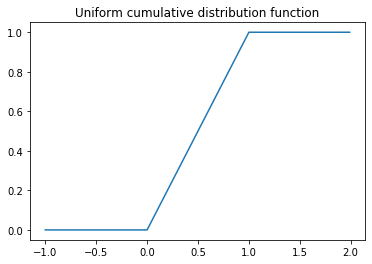

In [ ]:
x = [xi/100 for xi in range(-100,200)]
y = list(map(uniform_cdf,x))

plt.plot(x,y)
plt.title("Uniform cumulative distribution function")
plt.show()

<p><b> Normal Distribution</b></p>
<p> The normal distribution is the queen of distributions. It is a classic curve distribution bell shaped and is determined by two parameters: the mean $\mu$ (mu) and the standart deviation $\sigma$. The mean indicates where the bell is centralized and the standart deviation indicates the width of the bell.</p>
<h3> $f(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)²}{2\mu²}}$ </h3>

In [ ]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

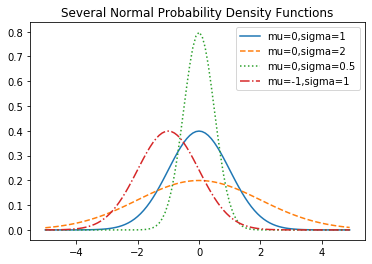

In [ ]:
xs = [x / 10 for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],"-.",label='mu=-1,sigma=1')

plt.title("Several Normal Probability Density Functions")
plt.legend()
plt.show()

<p> Is called standart normal distribution when $\mu=0$ and $\sigma=1$. If Z is a standart normal random variable, so:</p>
<p> $X = \sigma Z + \mu$</p>
<p> is normal as well but with a mean $\mu$ and standart deviation $\sigma$.</p>
<p> On the other hand, if X is a normal random variable with mean $\mu$ and standart deviation $\sigma$.</p>
$Z = \frac{X -\mu}{\sigma}$
<p> is a standart normal variable. </p>
<p> The cumulative distribution for the normal distribution can't be elementary writen, but we can use Python's math.erf:</p>
<p><h3> $erf(x) = \frac{1}{\sqrt{\pi}}\int^x_{-x} e^{t²}dt$</h3></p>

In [ ]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu)  / math.sqrt(2) / sigma)) / 2

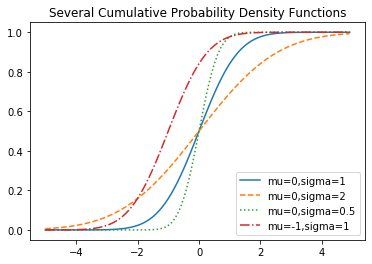

In [ ]:
xs = [x / 10 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],"-.",label='mu=-1,sigma=1')

plt.title("Several Cumulative Probability Density Functions")
plt.legend(loc=4)#bottom right
plt.show()

<p> Sometimes, its going to be more usefull later, to invert normal_cdf. It is a little more complicated to compute that, but normal_cdf is continuous, so we want to do a binary search</p>

In [ ]:
def inverse_normal_cdf(p, mu=0,sigma=1, tolerance=0.00001):
    #finds the closest inverse using binary search
    #if it isn't standart, computates the standart and redimension it.
    if mu or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0,0 #normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1   #normal_cdf(10)is (very close to) 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

<p><b> Central Limit Theorem</b></p>
<p> A random variable defined as the mean of a large set of random variables independently and indentically distributed is itself approximately normally distributed</p>
<p> In special, if x1,...xn are random variables with mean $\mu$ and standart deviation $\sigma$, and if n is big enough, then:</p>
<h3>$\frac{1}{n}(x_1 + ... + x_n)$</h3>
<p>is approximately normally distributed with mean $\mu$ and standart deviation  $\sigma\sqrt n$. In the same way:</p>
<h3>$\frac{x_1+ ... +x_n -\mu n}{\sigma \sqrt n}$</h3>
<p> is approximately normally distributed with mean 0 and standart deviation 1.</p>
<p> A simple way to illustrate this is considering a binomial random variable, that has two parameters $n$ and $p$. A Binomial($n$,$p$) random variable is just the sum of $n$ independent random variables Bernoulli($p$), and each one of them is equal to 1 with probability $p$ and $0$ with probability $1-p$:</p>

In [ ]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

<p> The mean of a Bernoulli($p$) variable is $p$, and it standart deviation is $\sqrt{p(1-p)}$. The central limit theorem says that, as $n$ increasesm the Binomial($n$,$p$) is approximately a normal random variable with mean $\mu = np$ and standart deviation $\sigma = \sqrt{np(1-p)}$.</p>

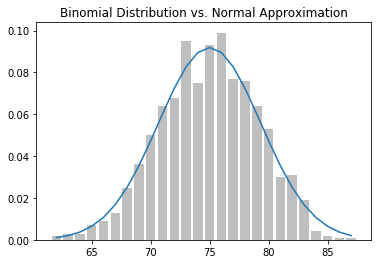

In [ ]:
from collections import Counter

def make_hist(p, n, num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x  for x in histogram.keys()]
           ,[v / num_points for v in histogram.values()]
           ,0.8
           ,color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n*p*(1-p))
    
    xs = range(min(data),max(data) +1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
             for i in xs]
    
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(0.75, 100, 1000)

<p><b><h1> Chapter 7 - Hypotesis and Inference</h1></b></p>
<p><i> "It is the mark of a truly intelligent person to be moved by statistics."</i></p>
<p> -George Bernard Shaw</p>
<p> We are going to test a number $n$ of coin throws and counting the number of heads $X$. Each coin throw is a Bernouli Trial, that means that $X$ is a Binomial($n$,$p$) random variable, that is approximately a normal distribution.</p>

In [ ]:
def normal_approximation_to_binomial(n,p):
    mu = p*n
    sigma = math.sqrt(n*p*(1-p))
    return mu, sigma

In [ ]:
#the normal cdf is the probability of a certain variable to be bellow a limit
normal_probability_bellow = normal_cdf

#is above the limit if it isn't bellow
def normal_probability_above(lo, mu=0, sigma=1):
    return (1 - normal_probability_bellow(lo, mu, sigma))

#is between if it is less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi,mu,sigma) - normal_cdf(lo,mu,sigma)

#is outside if it isn't between
def normal_probability_outstide(lo,hi,mu=0,sigma=1):
    return 1 - normal_probability_between(lo,ho,mu,sigma)

<p> We can do the inverse as well - find the region without tap or the interval (symmetric) around a mean that contributes to a probability level. For example, if we want to find a mean centrated interval having 60% of probability, so we are finding the cuts from superior and inferior tabs with 20% of probability each.</p>

In [ ]:
def normal_upper_bound(probability, mu=0, sigma=1):
    return inverse_normal_cdf(probability, mu, sigma)
    
def normal_lower_bound(probability, mu=0, sigma=1):
    return inverse_normal_cdf(1-probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    tail_probability = (1-probability)/2
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

Suppose that we want to throw a coin 1000 times. If our honest hypotesis is true, $X$ should be distributed normally with mean 500 and standart deviation of 15,8:

In [ ]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000,0.5)

We need to take a decision about significancy - of how much we want an type 1 error ("false positive"), where we reject $H_0$, even if its true. This will to accept the type 1 error will be 5%.

In [ ]:
normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

Presuming that $p$ is equal to 0.5 (for example, $H_0$ is true), there is only a 5% chance to observe that $X$ belongs outside this interval, because that is exactly the significance that we want. In the other hand, if $H_0$ is true, this test will show the correct result approximately 19 of the 20 times.
<p> We are interested in the power of the test, that is the probability to not commit a type 2 error, where we fail to reject $H_0$ even if its false. To measure this procedure, we have to specify what $H_0$ beeing false really means. In special, we will verify what happens if p is really 0.55, to know if the coin is really inclinated to give heads.</p>

In [ ]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
type_2_probability

0.11345199870463285

In [ ]:
power = 1 - type_2_probability
power

0.8865480012953671

Now imagine if our null hypotesis were that the coin shouldn't be inclined to heads, or that $p\leqslant0.5$. In that case, we would want a unilateral test that rejects the null hypotesis when $X$ were much higher than 50 but not when $X$ is lesser. Therefore, a significancy test of 5% would envolve using <i>normal_probability_bellow</i> to find the lower cut of 95% on what the probability would be:

In [ ]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)

type_2_probability = normal_probability_bellow(hi, mu_1, sigma_1)
type_2_probability

0.06362051966928273

In [ ]:
power= 1 - type_2_probability
power

0.9363794803307173

This is a more powerfull test, since that we don't reject $H_0$ when it is bellow 469 (unlikely if $H_1$ is true) and, instead, rejects $H_0$ when $X$ us between 526 and 531 (likely to happen if $H_1$ is true)

<b><h3> $p$-values</h3></b>

<p> Another way to execute the previous test is by using <i>p-values</i>. Instead of choosing a limit from some cut probability, we compute the probability - presuming that $H_0$ is true- that we can see a value at least so extreme thant we truly observe.</p>

In [ ]:
def two_sided_p_value(x,mu=0, sigma=1):
    if x >= mu:
        return 2*normal_probability_above(x, mu, sigma)
    else:
        return 2*normal_probability_bellow(x,mu,sigma)

In [ ]:
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

<p> A way to convince the relevance of this estimative is through simulation:</p>

In [ ]:
extreme_value_count=0
for _ in range(10000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                   for _ in range(1000))
    if num_heads >= 530 or num_heads <=470:
        extreme_value_count += 1
print (extreme_value_count/10000)

0.0583


As long as <i>p-value </i> is greater than the 5% significance, we don't reject the null hypotesis. If we saw 532 heads, the <i> p-value </i> would be:

In [ ]:
two_sided_p_value(532, mu_0, sigma_0)

0.04298479507085862

wich is lower than the 5% significante, and we would reject the null hypotesis. And exactly as the previous test. It is just another way to aproach statistics.
<p> In the same way, we would have:</p>

In [ ]:
upper_p_value = normal_probability_above
lower_p_value = normal_probability_bellow

In [ ]:
upper_p_value(524.5, mu_0, sigma_0)

0.06062885772582072

We wouldn't reject the null hypotesis, but

In [ ]:
upper_p_value(526.5, mu_0, sigma_0)

0.04686839508859242

We would reject the null hypotesis.

<p><h3> <b> Confidence Interval</b> </h3> </p>
<p> We have tested the hypotesis within a probability <i>p</i> of the <i>heads</i> parameter from the unkown <i> heads</i> distribution. When this is the case, the third approach is to build a confidence interval around the observated value of the parameter. </p>

<p> For example, we can estimate the probability of a loaded coin by analizing its mean value from the corresponding Bernoulli variables of each throw - 1 if it's heads, 0 if it's tails. If we observe 525 heads of 1000 throws, we can estimate <i> p</i> as 0.525 . </p>
<p> How confident can this estimative be? Analizing the Central Limit Theorem:</p>

In [ ]:
p_hat = 525/1000
mu = p_hat
sigma = math.sqrt(p_hat*(1-p_hat) / 1000)
mu, sigma

(0.525, 0.015791611697353755)

If we want to bem 95% confident, we can estiamte that p is between:

In [ ]:
normal_two_sided_bounds(0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

We can't assume that the coin is loaded - because 0.5 is inside our confidence interval.

In [ ]:
p_hat = 540/1000
mu = p_hat
sigma = math.sqrt(p_hat*(1-p_hat) / 1000)
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

In that case, the "honest coin" is not in the confident test.

<p><h3> <b> P-hacking</b> </h3> </p>
A proceedure that wrongly rejects the null hypotesis only 5% of the time will - by definition - wrongly rejects 5%  of the time the null hypotesis.

In [ ]:
def run_experiment():
    return[random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

In [ ]:
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                     for experiment in experiments
                     if reject_fairness(experiment)])
print (num_rejections)

46


It means that if you are trying to find "significant" results, you generaly will find. Test a suficient number of hypoteses against your data set and one of them, certantly, will look significant. Remove the right outlier values and will be likely that your <i>p-value</i> is bellow 0.05 .

<p><h3> <b> Example: Executing a A/B Test</b> </h3> </p>
<p> One of the initial tasks of a data scientist is to test optimizations, for example: a anouncer that wants to test wich of two anounces generates more clicks between propaganda A and propaganda B. </p>
<p> As a cientist, you decide to execute an experiment showing to the web-site visitors one of the two advertisements and recording how many people click in each.</p>
<p> Lets say that $N_A$ people see the advertising, and $n_A$ click on it. We can think as each visualization as a Bernoulli Trial in wich $p_A$ is the probability of someone clicking in the anouncement A. So (if $N_A$ is big) we know that $\frac{n_A}{N_A}$ is approximately a random variable with mean $p_A$ and standart deviation $\sigma_a = \sqrt{\frac{p_A(1-p_A)}{N_A}}$. Equaly for the advertisement B.</p>

In [ ]:
def estimated_parameters(N,n):
    p = n/N
    sigma = math.sqrt(p*(1-p)/N)
    return p, sigma

If we presume that both normals are independent (wich is reasonable, since the Bernoulli Trial should be), then both differences should be normal as well with mean $p_B - p_A$ and standart deviation $\sqrt{\sigma^2_A+\sigma^2_B}$ .
<p> Wich means that we can test the null hypotesis that $p_A$ and $p_B$ are the same ($p_B - p_A$ is zero) using the statistics:</p>

In [ ]:
def a_b_test_statistics(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A,n_A)
    p_B, sigma_B = estimated_parameters(N_B,n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

<p> should be a standart normal.</p>
<p> If the advertisement A receive 200 clicks of 1000 visualizations and the advertisement B receive 180 clicks of 1000 visualizations, the statistics are these:</p>

In [ ]:
z = a_b_test_statistics(1000, 200, 1000, 180)
two_sided_p_value(z)

0.2541419765422359

is big enouch and you can't know for sure if such difference exists. On the other hand, if advertisement B receive 150 clicks, we will have:

In [ ]:
z = a_b_test_statistics(1000, 200, 1000, 150)
two_sided_p_value(z)

0.003189699706216853

meaning that we would see this occuring 0,3% of the time if $p_A = p_B$.

<p><h3> <b> Bayesian Inference</b> </h3> </p>
<p> The procedures that we have seen are dedicated to do probabilistic declarations as: "there are only 3% of chance of observing those extreme statistics if the null hypotesis was true."</p>
<p> An alternative approach to inference is to treat the unkown parameters as random variables. The analyst (in the case, you) start with a previous distribution (a priori) to the parameters and use the observated data and the Bayes Theorem to receive the uptade of posterior distribution (a posteriori) to the parameters. Instead of judging the probability about the tests, judge the probability about its own parameters.</p>

For example, when the unkown parameter is a probability (as we saw in the coin throw case), frequently we use a previous from Beta distribution, putting all the probabilities between 0 and 1

In [ ]:
from math import gamma
from matplotlib import pyplot as plt

In [ ]:
#a normalized constant that sets the total probability between 0 and 1
def B(alpha,beta):
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha+beta)

In [ ]:
def beta_pdf(x, alpha, beta):
    if x < 0 or x >1:
        return 0
    return x ** (alpha-1)*(1-x)**(beta-1)/B(alpha,beta)

Generaly, the distribution centralizes its mean between:
$\frac{\alpha}{\alpha+\beta}$

In [ ]:
xs = [x/100 for x in range(0,100)]
ys_10_10 = [beta_pdf(x/100,10,10) for x in range(0,100)]
ys_4_16 = [beta_pdf(x/100,4,16) for x in range(0,100)]
ys_16_4 = [beta_pdf(x/100,16,4) for x in range(0,100)]

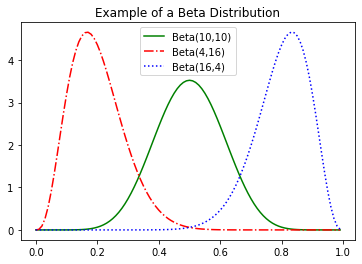

In [ ]:
plt.plot(xs,ys_10_10,'g-',label = 'Beta(10,10)')
plt.plot(xs,ys_4_16,'r-.',label='Beta(4,16)')
plt.plot(xs,ys_16_4,'b:',label='Beta(16,4)')

plt.legend(loc=9)
plt.title("Example of a Beta Distribution")
plt.show()